<a href="https://colab.research.google.com/github/diana-rahma/Machine-Learning_Ganjil25_11/blob/main/ML_JS4_11_Diana_Rahmawati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas Praktikum

#### 1. Tugas K-Means
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

#### 2. Tugas DB-Scan
1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
5. Lakukan eksperimen:
- eps = 0.05, 0.1, 0.3, 0.5
- min_samples = 3, 10, 20
- Catat perubahan klaster, noise, dan kualitas evaluasi.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Seleksi fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


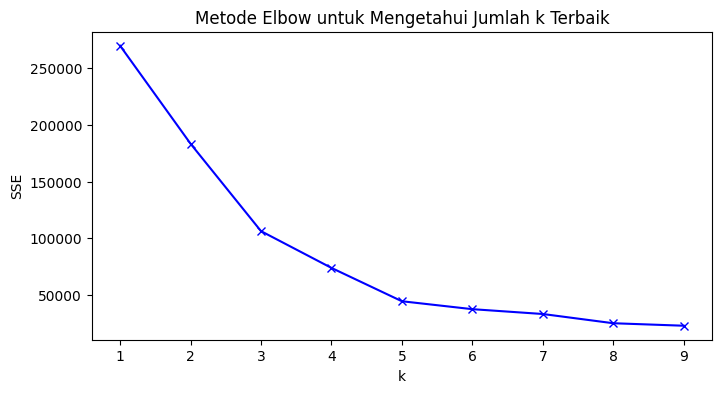

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=183499.07470288622
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44454.47647967972
k=6; SSE=37455.98455516028
k=7; SSE=33192.646513045765
k=8; SSE=25041.849623564838
k=9; SSE=22850.9375174539


In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

(X[:, 0], X[:, 1])
()

()

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

print("Homogeneity Score   :", homogeneity_score(y, labels))
print("Completeness Score  :", completeness_score(y, labels))
print("V-measure Score     :", v_measure_score(y, labels))
print("Adjusted Rand Index :", adjusted_rand_score(y, labels))
print("Adjusted MI Score   :", adjusted_mutual_info_score(y, labels))

# Silhouette hanya bisa dihitung jika cluster > 1 dan < n_samples unik
if len(set(labels)) > 1 and len(set(labels)) < len(labels):
    print("Silhouette Score    :", silhouette_score(X, labels))
else:
    print("Silhouette Score    : Tidak bisa dihitung (cluster tidak valid)")

Homogeneity Score   : 1.0
Completeness Score  : 1.0
V-measure Score     : 1.0
Adjusted Rand Index : 1.0
Adjusted MI Score   : 1.0
Silhouette Score    : 0.33440074394139574


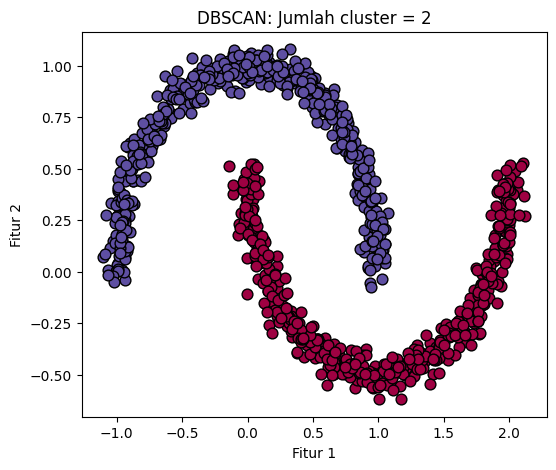

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Calculate core_samples_mask
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(6, 5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk noise
        col = "k"

    class_member_mask = (labels == k)

    # Core points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=60, c=[col], marker="o", edgecolors="k")

    # Non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=20, c=[col], marker="o", edgecolors="k")

plt.title(f"DBSCAN: Jumlah cluster = {n_clusters_}")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

In [ ]:
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

# 4. Eksperimen
results = []
for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(X)
        labels = db.labels_

        # Jumlah cluster dan noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Evaluasi (hati-hati silhouette hanya valid kalau cluster > 1)
        if n_clusters > 1:
            silhouette = silhouette_score(X, labels)
        else:
            silhouette = np.nan

        results.append({
            "eps": eps,
            "min_samples": min_s,
            "clusters": n_clusters,
            "noise": n_noise,
            "homogeneity": homogeneity_score(y, labels),
            "completeness": completeness_score(y, labels),
            "v_measure": v_measure_score(y, labels),
            "ARI": adjusted_rand_score(y, labels),
            "AMI": adjusted_mutual_info_score(y, labels),
            "Silhouette": silhouette
        })

# 5. Tampilkan hasil dalam tabel
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3         5     50     0.952866      0.443662   0.605431   
1   0.05           10        30    320     0.683988      0.168265   0.270087   
2   0.05           20         0   1000     0.000000      1.000000   0.000000   
3   0.10            3         2      1     1.000000      0.989700   0.994823   
4   0.10           10         2      3     1.000000      0.974224   0.986944   
5   0.10           20         2     10     0.990290      0.924822   0.956437   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         1      0     0.000000      1.000000   0.000000   
10  0.50           10         1      0     0.000000      1.000000   0.000000   
11  0.50           20         1      0  

### Implementasi data pada jurnal

Penerapan K-Means Cluster Pada Daerah Potensi Pertanian Karet Produktif
di Sumatera Utara

[Link Jurnal](https://d1wqtxts1xzle7.cloudfront.net/111939311/223-libre.pdf?1709183072=&response-content-disposition=inline%3B+filename%3DPenerapan_K_Means_Cluster_Pada_Daerah_Po.pdf&Expires=1761014233&Signature=N9tyOt6AjJYZ5y~EfA8cDzmDKs-u6ykUerkIirFWx1KqZ8hMxCooqcya6SMog5p24Xl7cyF13foGFMjjDtHN2vERYqJ0fNl1MRYOST7aYcCxswr~VtLVcE3xX5FGU~mPoQAacY06c9ErYZxXG4evqBjsk2sW4eKIiAIBca1qwcnqLcS~eBHQLwtitUvA1kMb~bEP58mhKoDZis0Fq42B02mfEmLhjB4LzPG18VGOYxWOHFH350-Otw-Bz4Xxz5~TrpnHRh-1KabjGz~1FVuY1ZmY-qnh0qInfgs7ElG15R6huU7Csy2jQ~Jq6DUH5rfsbGhATWKOlOoMyHNQZ9XImQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)


In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data_karet_sumut.csv')

df.head()

,Kabupaten/Kota,T.B.M (ha),T.M (ha),T.T.M (ha),Jumlah (ha),Produksi (ton)
0,Nias,988,2203,382,3573,2917
1,Mandailing Natal,5141,55360,17908,78409,84212
2,Tapanuli Selatan,5942,9875,8526,24343,8300
3,Tapanuli Tengah,4015,23981,4481,32477,20512
4,Tapanuli Utara,833,8133,130,9096,5621


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

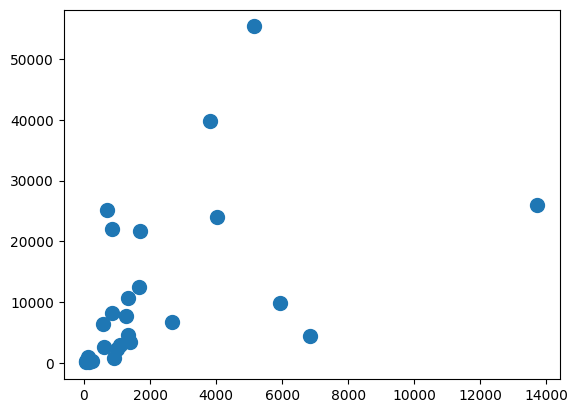

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

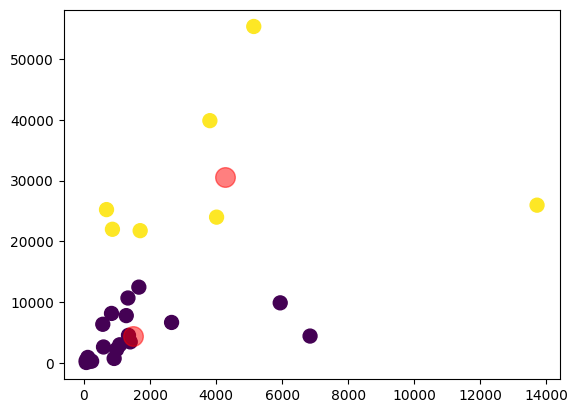

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 4703859935.353385


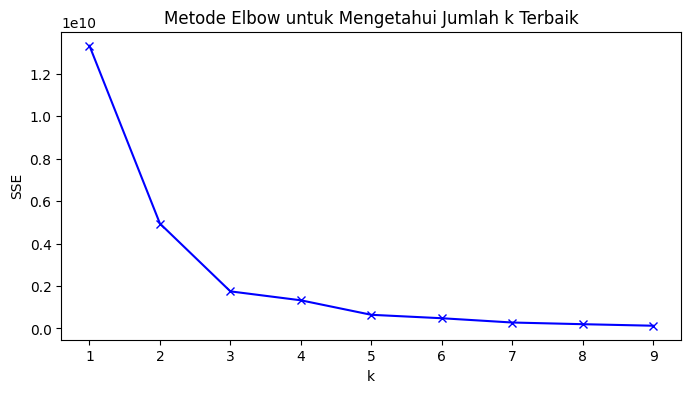

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=13331334303.153847
k=2; SSE=4946166496.318181
k=3; SSE=1748399105.507937
k=4; SSE=1327265356.5
k=5; SSE=643299259.8222221
k=6; SSE=481450455.4701299
k=7; SSE=279540015.3701299
k=8; SSE=200426200.1666667
k=9; SSE=128253266.0
